## Predicting Car Prices

##### Importing dependencies

In [2]:
!pip install numpy pandas matplotlib scikit-learn

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


#### Importing Data Sets

In [4]:
df = pd.read_csv('Car_prices_known.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Giving Numerical Values to Categorical Data

In [5]:
df['Mileage'] = df['Mileage'].str.replace('km', '')

In [7]:
df['Mileage'] = df['Mileage'].astype(int)

In [9]:
df.replace({'Fuel type':{'Petrol':0,'Diesel':1,'CNG':3, 'Hybrid':2, 'LPG' :4, 'Plug-in Hybrid':5, 'Hydrogen':6}},inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\2889463339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel type':{'Petrol':0,'Diesel':1,'CNG':3, 'Hybrid':2, 'LPG' :4, 'Plug-in Hybrid':5, 'Hydrogen':6}},inplace=True)


In [10]:
df.replace({'Gear box type':{'Automatic':0, 'Tiptronic':1, 'Manual':2, 'Variator':3}}, inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\2245317161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gear box type':{'Automatic':0, 'Tiptronic':1, 'Manual':2, 'Variator':3}}, inplace=True)


In [12]:
df.replace({'Drive wheels': {'Front':0, '4x4':1, 'Rear':2}}, inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\540842669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Drive wheels': {'Front':0, '4x4':1, 'Rear':2}}, inplace=True)
C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\540842669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Drive wheels': {'Front':0, '4x4':1, 'Rear':2}}, inplace=True)


In [36]:
df.replace({'Leather interior':{'Yes':0, 'No':1}}, inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\3055267925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Leather interior':{'Yes':0, 'No':1}}, inplace=True)


In [13]:
df['Engine volume'] = df['Engine volume'].astype(float)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\1462483032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine volume'] = df['Engine volume'].astype(float)


#### Dropping Unnecessary or Problematic columns

In [8]:
df.drop(['ID', 'Levy', 'Model', 'Category', 'Doors', 'Wheel', 'Color'], axis = 1, inplace=True)


KeyError: "['ID', 'Levy', 'Model', 'Category', 'Doors', 'Wheel', 'Color'] not found in axis"

In [11]:
df= df[~df['Engine volume'].str.contains('Turbo')]

In [23]:
df.drop('Manufacturer', axis =1, inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\666478942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Manufacturer', axis =1, inplace=True)


In [14]:
df['Car_age'] = 2025 - df['Prod. year']
df.drop(['Prod. year'], axis=1, inplace=True)

C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\3045040531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_age'] = 2025 - df['Prod. year']
C:\Users\kesha\AppData\Local\Temp\ipykernel_31568\3045040531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Prod. year'], axis=1, inplace=True)


In [24]:
df.head()

,Price,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags,Car_age
0,13328,0,2,3.5,186005,6.0,0,1,12,15
1,16621,1,0,3.0,192000,6.0,1,1,8,14
2,8467,1,0,1.3,200000,4.0,3,0,2,19
3,3607,0,2,2.5,168966,4.0,0,1,0,14
4,11726,0,0,1.3,91901,4.0,0,0,4,11


#### Using RandomForestRegressor for predicting Price

In [25]:
X = df.drop('Price', axis =1)
Y = df['Price']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [28]:
predictions = regressor.predict(X_train)


In [29]:
r2 = r2_score(Y_train, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9334160740745112


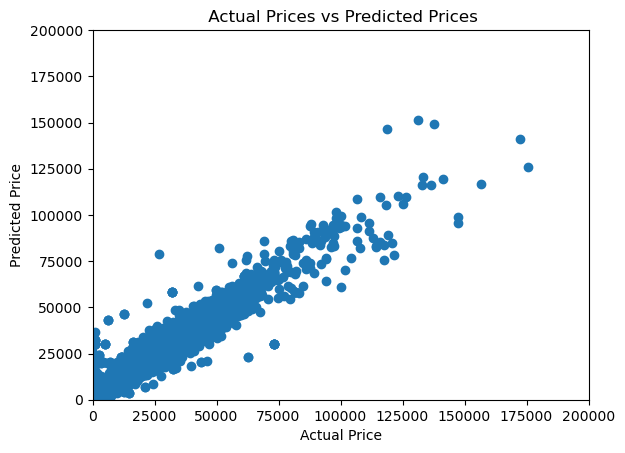

In [30]:
plt.scatter(Y_train, predictions)
plt.xlabel("Actual Price")
plt.xlim([0, 200000])
plt.ylim([0, 200000])
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### Testing the model on Untrained Data

In [31]:
regressor.fit(X_test, Y_test)

RandomForestRegressor(random_state=0)

In [32]:
predictions_test = regressor.predict(X_test)

In [33]:
r2 = r2_score(Y_test, predictions_test)
print(f'R-squared: {r2}')

R-squared: 0.8055174630742041


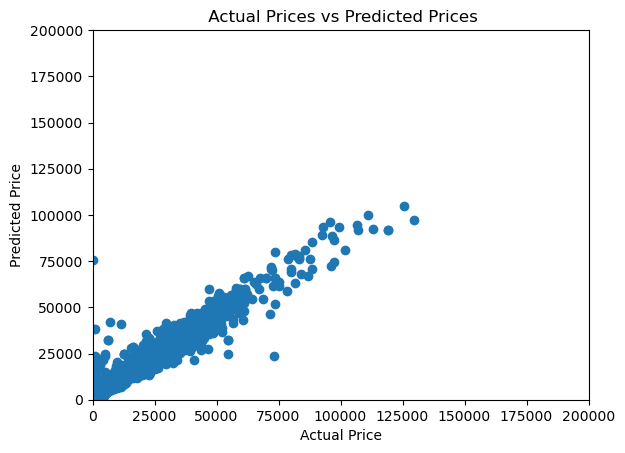

In [34]:
plt.scatter(Y_test, predictions_test)
plt.xlabel("Actual Price")
plt.xlim([0, 200000])
plt.ylim([0, 200000])
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

As we can see, RandomForestRegressor gives pretty accurate value upto 80% accuracy